# Prob no3 - Method for calculating profitability 

In [18]:
import pandas as pd
import numpy as np
import random 
from scipy import linalg
import math
import matplotlib.pyplot as plt
import scipy.stats

In [149]:
dataset = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/R/datasett_bus_surv_no2.csv"

In [150]:
df = pd.read_csv(dataset, sep=",", engine='python')


In [21]:
# df.drop(['navn', 'orgnr_foretak', 'f_postnr', 'sn07_1'], axis=1, inplace=True)
df['orgnr'] = df['orgnr']-random.randint(1,1000)
df['orgnr_foretak'] = df['orgnr_foretak']-random.randint(1,1000)
df['employ'] = df['employ']+random.randint(1,15)
df.head()


,orgnr,orgnr_foretak,navn1,sector,bof_nace07,inves_fou,inves_fou_sale,inves_facilities,inves_facilities_sale,inves_plot,...,cashlimit,cashlimit1,equityFunding,debtFunding,signHurdle,sensitivity,hurdleRate,uncertainCash,_est_no21,_est_no22
0,811279858,811280175,HOVLAND TREVAREFABRI,2100.0,16.232000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,1
1,812749068,812749385,Bergene Holm AS,2100.0,16.100000,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,1,0,1,1
2,816063118,816063435,SNØGG AS,2100.0,21.200001,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,0,1,1,1,1
3,829093598,829093915,STRYN BETONGELEMENT,2100.0,23.610001,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,1,1
4,832008348,832008665,SKIBSPLAST A/S,2100.0,30.120001,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,1


In [151]:
df.drop(['navn1'], axis=1, inplace=True)

In [152]:
# list of explanatory variables, important to stack the variables and estimated parametes in the same order
explanatoryNo3 = ['higheduc', 'smallcap','largecap',  'subsidary', 'no2_1', 'no2_2', 'sensitivity' ,'hurdleRate']
# make a new df
df_short3 = df.copy(deep=True)

In [153]:
df_short3=df_short3.loc[:,explanatoryNo3].dropna(axis=0, how='any')
df_short3.head()

,higheduc,smallcap,largecap,subsidary,no2_1,no2_2,sensitivity,hurdleRate
0,0.0,1,0,0,1,1,0,1
1,1.0,0,1,0,2,2,0,1
2,1.0,1,0,0,2,2,0,1
3,0.0,1,0,0,3,0,0,0
4,0.0,1,0,0,1,2,0,1


In [154]:
df_short3.isnull().describe()

,higheduc,smallcap,largecap,subsidary,no2_1,no2_2,sensitivity,hurdleRate
count,298,298,298,298,298,298,298,298
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,298,298,298,298,298,298,298,298


In [155]:
# df_short.dropna(axis=0, how='any', inplace=True)
X_3 = df_short3.values


## Regresjonsresultater

                    EAC   &      IRR   &        NPV   &       Payback   &      Other models   &        No model   \\
Small cap    &       0.047   &      -0.142   &      -1.152***&      -0.183   &       0.940*  &       0.544   \\
Large cap    &       0.426   &       1.265***&       0.956** &       0.292   &       1.154** &           .   \\
Higher education    &       0.282   &       0.626*  &       0.857** &       0.259   &      -0.305   &      -1.046** \\
Subsidiary   &       0.588   &       0.583*  &      -0.217   &       0.465   &       0.048   &      -1.009   \\
Freq. of EquityFunding       &       0.459   &       0.244   &      -0.565** &       0.287   &       0.554   &      -0.538   \\
Freq of DebtFunding       &      -0.288   &       0.064   &      -0.522***&       0.201   &       0.435** &      -0.013   \\
Sensitivity analysis &      -0.251   &       1.348***&       1.167***&       0.274   &      -0.598   &           .   \\
Imp. of HurdleRate  &       1.637   &       2.404***&       2.054***&       0.943** &      -0.093   &      -3.212***

explanatoryNo3 = ['higheduc', 'smallcap','largecap',  'subsidary', 'no2_1', 'no2_2', 'sensitivity' ,'hurdleRate']

In [156]:
beta_1_3 = ([.2819157  , .0472377 , .4256163   ,.5881743  , .4585202 ,  -.2878372 ,  -.2507269  , 1.637389  ])

In [157]:
beta_2_3 = ([ .6263949  , -.1415472  ,  1.26501  ,    .5826111 ,  .2440681  , .0642679 ,  1.347802  , 2.403717])

In [158]:
beta_3_3= ([.8571165 ,  -1.151734  , .9563701  ,  -.2174719  ,-.5650719  , -.5221819   ,1.166898 ,  2.054198])

In [159]:
beta_4_3 = ([.2585995  , -.182598 ,  .2923246 ,   .4650673 ,  .2873178  , .2006496  ,  .274211 ,  .9434336])

In [160]:
beta_5_3= ([-.3047959 ,  .9404743,   1.154397  ,  .0480909  , .5539917  , .4347656 ,  -.5976469  , -.0926396 ])

In [161]:
beta_6_3 = ([-1.046108 , .5441672 ,         0   , -1.008954   ,-.5377209  , -.0127514     ,    0 ,  -3.212488 ])

In [162]:
# Threshold for no3_1
cut_1_3 =  [-4.751879] 

#Threshold for no3_2
cut_2_3 =[-5.332868] 

#Threshold for no3_3
cut_3_3 =[-1.165978 ]

#Threshold for no2_4
cut_4_3 =[ -3.636997 ]

#Threshold for no2_5
cut_5_3 =[ -3.579774]

#Threshold for no2_6
cut_6_3 =[3.143438]

#  _cons              -4.752**        -5.333***       -1.166          -3.637***       -3.580**         3.143*  

 

In [163]:
cut_avg_1_3 = 1/len(cut_1_3) * sum(cut_1_3) 

#Threshold for no2_2
cut_avg_2_3 = 1/len(cut_2_3) * sum(cut_2_3) 

#Threshold for no2_3
cut_avg_3_3 = 1/len(cut_3_3) * sum(cut_3_3) 

#Threshold for no2_4
cut_avg_4_3 = 1/len(cut_4_3) * sum(cut_4_3) 

#Threshold for no2_5
# cut_avg_5_3 = 1/len(cut_5_3) * sum(cut_5_3) 

#Threshold for no2_6
cut_avg_6_3 = 1/len(cut_6_3) * sum(cut_6_3) 
print(cut_avg_1_3, cut_avg_2_3, cut_avg_3_3, cut_avg_4_3, cut_avg_6_3)
#  cut_avg_5_3,

-4.751879 -5.332868 -1.165978 -3.636997 3.143438


In [197]:
### Testcase for prediksjon på en enkelt bedrift
SumYNo3 = ( math.exp(-cut_avg_1_3 + X_3[0:1]@beta_1_3)+
        math.exp(-cut_avg_2_3 + X_3[0:1]@beta_2_3) + 
        math.exp(-cut_avg_3_3 + X_3[0:1]@beta_3_3) + 
        math.exp(-cut_avg_4_3 + X_3[0:1]@beta_4_3) +  
        math.exp(-cut_avg_5_3 + X_3[0:1]@beta_5_3) + 
        math.exp(-cut_avg_6_3 + X_3[0:1]@beta_6_3))

# PredY1eNo2 = math.exp(-cut_avg_1_2 + X_2[0:1]@beta_1_2) /SumYNo2
PredY2eNo2_test = math.exp(-cut_avg_2_3 + X_3[3:4]@beta_2_3) /SumYNo3
# PredY3eNo2 = math.exp(-cut_avg_3_2 + X_2[0:1]@beta_3_2) /SumYNo2 
# PredY4eNo2 = math.exp(-cut_avg_4_2 + X_2[0:1]@beta_4_2) /SumYNo2
# PredY5eNo2 = math.exp(-cut_avg_5_2 + X_2[0:1]@beta_5_2) /SumYNo2
# PredY6eNo2 = math.exp(-cut_avg_6_2 + X_2[0:1]@beta_6_2) /SumYNo2

print(PredY2eNo2_test)

0.09817034168218215


In [195]:
math.exp(-cut_avg_2_3 + X_3[55:56]@beta_2_3) 
print(math.exp(5.3), math.exp(1), math.exp(3.6))
beta_2_3

200.33680997479166 2.718281828459045 36.59823444367799


[0.6263949,
 -0.1415472,
 1.26501,
 0.5826111,
 0.2440681,
 0.0642679,
 1.347802,
 2.403717]

In [204]:
# Lage lister som kan holde predikert verdi
listeSumYNo3 = []
listePredY1eNo3 = []
listePredY2eNo3 = []
listePredY3eNo3 = []
listePredY4eNo3 = []
# listePredY5eNo3 = []
listePredY6eNo3 = []

# Regne ut X*Beta i løkke for hver enkelt bedrift

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_1_3 + X_3[0+i:1+i]@beta_1_3)]
    listePredY1eNo3.append(pred_i[0]) 

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_2_3 + X_3[0+i:1+i]@beta_2_3)]
    listePredY2eNo3.append(pred_i[0]) 
    
    
for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_3_3 + X_3[0+i:1+i]@beta_3_3)]
    listePredY3eNo3.append(pred_i[0]) 

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_4_3 + X_3[0+i:1+i]@beta_4_3)]
    listePredY4eNo3.append(pred_i[0]) 

# for i in range(len(X_3)):
#     pred_i = [math.exp(-cut_avg_5_3 + X_3[0+i:1+i]@beta_5_3)]
#     listePredY5eNo3.append(pred_i[0]) 

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_6_3 + X_3[0+i:1+i]@beta_6_3)]
    listePredY6eNo3.append(pred_i[0]) 

   
# med, min, max


In [166]:
# listePredY1eNo2


In [167]:
metode = dict()



In [205]:
# Summere alle elementene i listen for å finne nevneren i P-uttrykket
listeSumYeNo3 = [ x+y+z+u+t for x , y, z, u, t in zip(listePredY1eNo3, listePredY2eNo3,listePredY3eNo3,listePredY4eNo3,listePredY6eNo3)]
# listePredY5eNo3,

#  stated preferences - spørre om hva bruker du vanligvis å foretrekke å gjøre, 
# bedre å sprørre konkret på hver metode. 
# statistisk metode i data kap
# Flytte bus surv cap til et underkap av data. 
# Og econometric methods som et eget kap
# merk at kap 5 - analyse av bus surv ikke er empririsk analyse av teori. 

# ta med korrelasjonsmatrise for no2_*, no3_* og no4_*

In [206]:
# Predikere ssh for valg av de ulike metodene i en multinomisk setting
P_1_3 = [a/m for a, m in zip(listePredY1eNo3, listeSumYeNo3)]
P_2_3 = [a/m for a, m in zip(listePredY2eNo3, listeSumYeNo3)]
P_3_3 = [a/m for a, m in zip(listePredY3eNo3, listeSumYeNo3)]
P_4_3 = [a/m for a, m in zip(listePredY4eNo3, listeSumYeNo3)]
# P_5_3 = [a/m for a, m in zip(listePredY5eNo3, listeSumYeNo3)]
P_6_3 = [a/m for a, m in zip(listePredY6eNo3, listeSumYeNo3)]

In [207]:
zipListP3 = list(zip(P_1_3, P_2_3, P_3_3, P_4_3, P_6_3))
#  P_5_3,
dfP3 = pd.DataFrame(zipListP3, columns = ("EAC", 'IRR', 'NPV', 'Payback', 'No model'))
# 'Several models', 

In [208]:
dfPDesc = dfP3.describe()
# filename = folderFig+"/dfPDes3.xlsx"
# dfPDesc.to_excel(filename)

In [209]:
dfPDesc

,EAC,IRR,NPV,Payback,No model
count,298.000000,298.000000,298.000000,298.000000,2.980000e+02
mean,0.160544,0.799621,0.000445,0.039388,1.544715e-06
std,0.114590,0.134876,0.000545,0.034888,5.800294e-06
min,0.010464,0.402172,0.000036,0.003310,1.837047e-10
25%,0.068683,0.721883,0.000147,0.015338,4.650931e-09
50%,0.138883,0.826611,0.000304,0.031404,1.859566e-08
75%,0.236264,0.914831,0.000574,0.045115,9.110770e-08
max,0.516995,0.982991,0.004599,0.175159,4.830671e-05


In [97]:
#  Finne gjennomsnittlig prediksjon

snittPredY1 = np.mean(P_1_3)    
snittPredY2 = np.mean(P_2_3)    
snittPredY3 = np.mean(P_3_3)    
snittPredY4 = np.mean(P_4_3)    
# snittPredY5 = np.mean(P_5_3)        
snittPredY6 = np.mean(P_6_3) 


P_1_3.sort(reverse=True)
MaxValueP_1_3 = P_1_3[0]
P_1_3.sort()
MinValueP_1_3= P_1_3[0]

P_2_3.sort(reverse=True)
MaxValueP_2_3 = P_2_3[0]
P_2_3.sort()
MinValueP_2_3= P_2_3[0]

P_3_3.sort(reverse=True)
MaxValueP_3_3 = P_3_3[0]
P_3_3.sort()
MinValueP_3_3= P_3_3[0]

P_4_3.sort(reverse=True)
MaxValueP_4_3 = P_4_3[0]
P_4_3.sort()
MinValueP_4_3= P_4_3[0]

# P_5_3.sort(reverse=True)
# MaxValueP_5_3 = P_5_3[0]
# P_5_3.sort()
# MinValueP_5_3= P_5_3[0]

P_6_3.sort(reverse=True)
MaxValueP_6_3 = P_6_3[0]
P_6_3.sort()
MinValueP_6_3= P_6_3[0]


print(MaxValueP_1_3, MinValueP_1_3, snittPredY1)

0.4097843217169391 0.0031530131085809447 0.0876077282910606


In [136]:
print(snittPredY1, snittPredY2, snittPredY3, snittPredY4, snittPredY5, snittPredY6)

0.0876077282910606 0.8474408967579327 0.0004126973879903311 0.06290418032661928 0.03226881584013518 1.0458827460087487e-06


C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


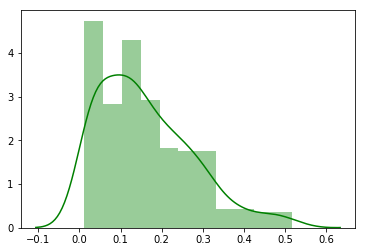

In [173]:
folderFig = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/Artikkel"
import seaborn as sns
sns.distplot(P_1_3, color="green")

filename = folderFig+'/P13.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


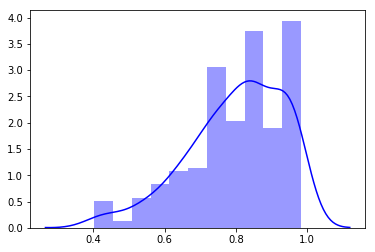

In [174]:
import seaborn as sns
sns.distplot(P_2_3, color="blue")
filename = folderFig+'/P23.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


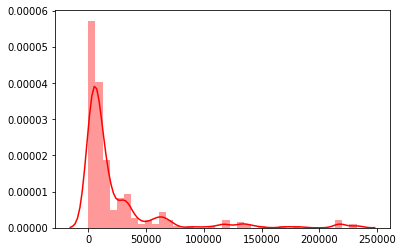

In [180]:
sns.distplot(listePredY2eNo3, color="red")

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


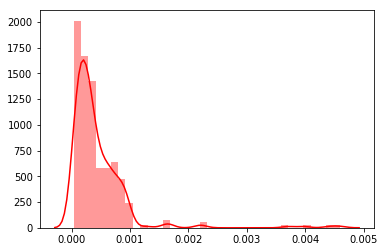

In [175]:
import seaborn as sns
sns.distplot(P_3_3, color="red")
filename = folderFig+'/P33.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


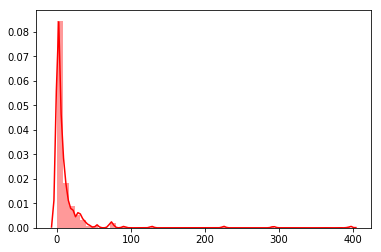

In [179]:
import seaborn as sns
sns.distplot(listePredY3eNo3, color="red")
# filename = folderFig+'/PP33.png'
# plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


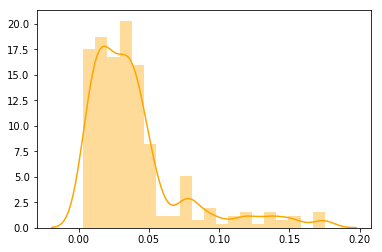

In [176]:
import seaborn as sns
sns.distplot(P_4_3, color="orange")
filename = folderFig+'/P43.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


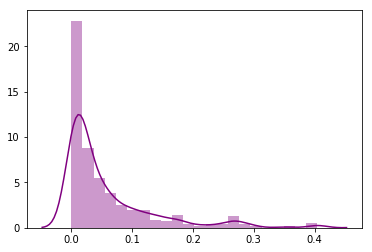

In [143]:
# plt.hist(P_2_2, 50, normed=1, facecolor='blue', alpha=0.5)
sns.distplot(P_5_3, color="purple")
filename = folderFig+'/P53.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


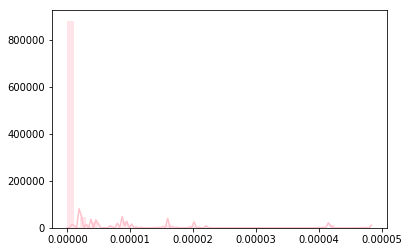

In [177]:
# plt.hist(P_6_2, 50, normed=1, facecolor='red', alpha=0.5)
sns.distplot(P_6_3, color="pink")
filename = folderFig+'/P63.png'
plt.savefig(filename)